# 1. Data Loading and Exploration
 

In [17]:
# 1. Data Loading and Exploration

# Import necessary libraries
import numpy as np      # For numerical operations
import pandas as pd     # For data manipulation
from pandas.plotting import autocorrelation_plot as auto_corr

# For visualization
import matplotlib.pyplot as plt  
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

# For date-time operations
import math
from datetime import datetime
from datetime import timedelta

# Additional imports
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
!pip install pmdarima
from pmdarima.utils import decomposed_plot
from pmdarima.arima import decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

# Set pandas options
pd.options.display.max_columns=100 

# Load data
df_store = pd.read_csv('WSF/stores.csv')  # store data
print(f"Row count: {len(df_store)}")

df_train = pd.read_csv('WSF/train.csv')  # train set
print(f"Row count: {len(df_train)}")

df_features = pd.read_csv('WSF/features.csv')  # external information
print(f"Row count: {len(df_features)}")

# Examine the data
df_store.head()
df_train.head()
df_features.head()

# Merge the three datasets
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.drop(['IsHoliday_y'], axis=1, inplace=True)  # Remove duplicate column
df.rename(columns={'IsHoliday_x':'IsHoliday'}, inplace=True)  # Rename column

# View the merged dataset
df.head()
df.shape

# Check the number of stores and departments
print(f"Number of stores: {df['Store'].nunique()}")
print(f"Number of departments: {df['Dept'].nunique()}")

# Create pivot table to examine store-department relationships
store_dept_table = pd.pivot_table(df, index='Store', columns='Dept',
                                  values='Weekly_Sales', aggfunc=np.mean)
display(store_dept_table)

Row count: 45
Row count: 421570
Row count: 8190
Number of stores: 45
Number of departments: 81


Dept,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,58,59,60,65,67,71,72,74,77,78,79,80,81,82,83,85,87,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,24919.270629,10566.545315,38692.880490,15268.550909,24151.061329,9196.557902,7765.304425,1259.018531,4091.571538,7808.450559,8052.076154,21623.184685,6187.389720,10152.336783,6767.997273,1374.649650,593.113986,4651.040210,3415.295035,2408.533287,8202.668392,5946.431189,11530.831678,2535.730909,1476.203566,2800.495105,79978.222587,NaN,58510.409161,1064.769650,7940.326224,NaN,4872.724406,23.995070,19662.989860,-116.454545,917.727920,11437.931259,NaN,32.712727,2355.439371,90.921053,12817.843357,4000.480629,3372.474476,857.775105,1020.995804,NaN,7436.017343,2732.473357,47390.644895,11652.827413,677.000000,11.500000,33974.792937,17139.314615,29780.696573,20727.860909,5704.048951,3685.875524,46006.277203,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,23382.686154,7735.946294,46117.959231,21314.132937,27005.179650,13790.854196,11687.563009,4053.439930,5748.619441,9910.939860,12923.013846,29170.616573,8309.564545,15299.508392,9347.725105,1837.954615,798.913217,7111.482657,4981.155385,3884.756993,11755.096713,7488.096993,17595.203497,3875.588601,2631.750559,4500.250769,85114.996014,2.340000,78174.560210,2592.220769,8768.857692,NaN,7245.541189,29.139848,29675.324545,18.068182,1358.347914,15568.465664,NaN,16.226667,4148.373566,104.502868,13060.297692,5545.122308,21610.019091,1391.520559,221.545946,NaN,12125.255594,4634.609371,72929.496643,16986.406014,817.500000,11.764000,32759.096993,26041.273566,31000.484266,24647.232587,5710.719650,3672.042797,24932.985804,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,8774.928042,2383.603007,11363.061678,4626.649021,7871.568322,2634.199650,2960.677739,731.313147,1682.199231,1244.529650,3101.769860,10913.330070,2763.627343,4260.447972,2850.050839,500.193636,166.870070,1517.404056,1243.926993,878.475455,4296.111049,3228.155105,4579.719161,1439.325524,622.689371,NaN,108598.364126,NaN,18203.108252,646.832028,4422.944406,NaN,2133.657762,9.922500,6179.259510,38.875000,NaN,17.581481,NaN,5.411803,961.390210,58.311239,7153.737902,1606.808881,NaN,244.878455,138.125874,NaN,2021.482657,1101.610000,22796.856573,3374.960769,424.000000,6.000000,7230.372448,24.420476,1429.300070,6746.578392,19.330000,874.128182,939.435455,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,27145.836643,8141.910979,69596.447343,28567.509441,21270.153007,15815.878042,13146.543790,3038.317762,8888.302867,8865.273147,17289.916294,46234.012867,10875.301189,15640.748531,18429.759930,2579.906154,916.232238,9472.121189,7683.686783,3813.243986,13685.430350,12304.056224,25142.675385,4376.574755,3005.231469,3640.752727,80093.946084,1.560000,78729.263077,975.417622,9511.818531,NaN,5441.563566,13.696939,39128.896154,23.536154,2324.615532,6911.676643,NaN,8.200000,3721.521329,131.887000,18662.627203,6040.540839,6078.142308,1586.446993,410.795105,NaN,12471.426713,7686.018741,101244.450839,20627.307762,344.571429,5.375000,52436.656923,19379.101399,31055.285315,29371.320979,9161.217343,2730.060000,14223.462308,8

# 2. Data Cleaning


In [18]:
# 2. Data Cleaning

# Check for non-positive sales values
neg_sales = df.loc[df['Weekly_Sales']<=0]
print(f"Number of rows with non-positive sales: {len(neg_sales)}")
print(f"Percentage of data: {len(neg_sales)/len(df)*100:.2f}%")

# Remove rows with non-positive sales
df = df.loc[df['Weekly_Sales'] > 0]
print(f"New data shape: {df.shape}")

# Check for missing values
df.isna().sum()

# Fill missing values in markdown columns with zeros
df = df.fillna(0)

# Confirm no missing values remain
df.isna().sum()

# Create specific holiday indicator columns
# Super bowl dates
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

# Christmas dates
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])

# Create time-based features
df['week'] = df['Date'].dt.isocalendar().week
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

# Save the cleaned data for later use
df.to_csv('clean_data.csv')

Number of rows with non-positive sales: 1358
Percentage of data: 0.32%
New data shape: (420212, 16)


# 3. Exploratory Data Analysis


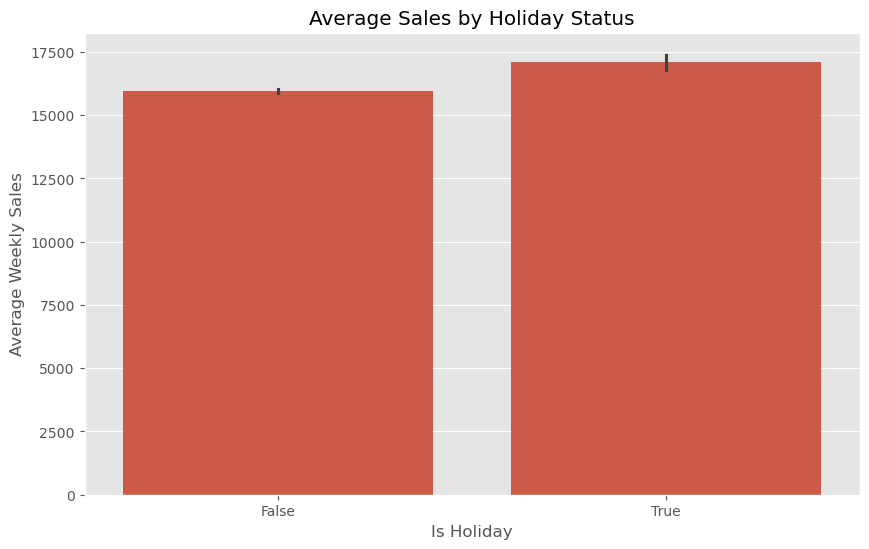

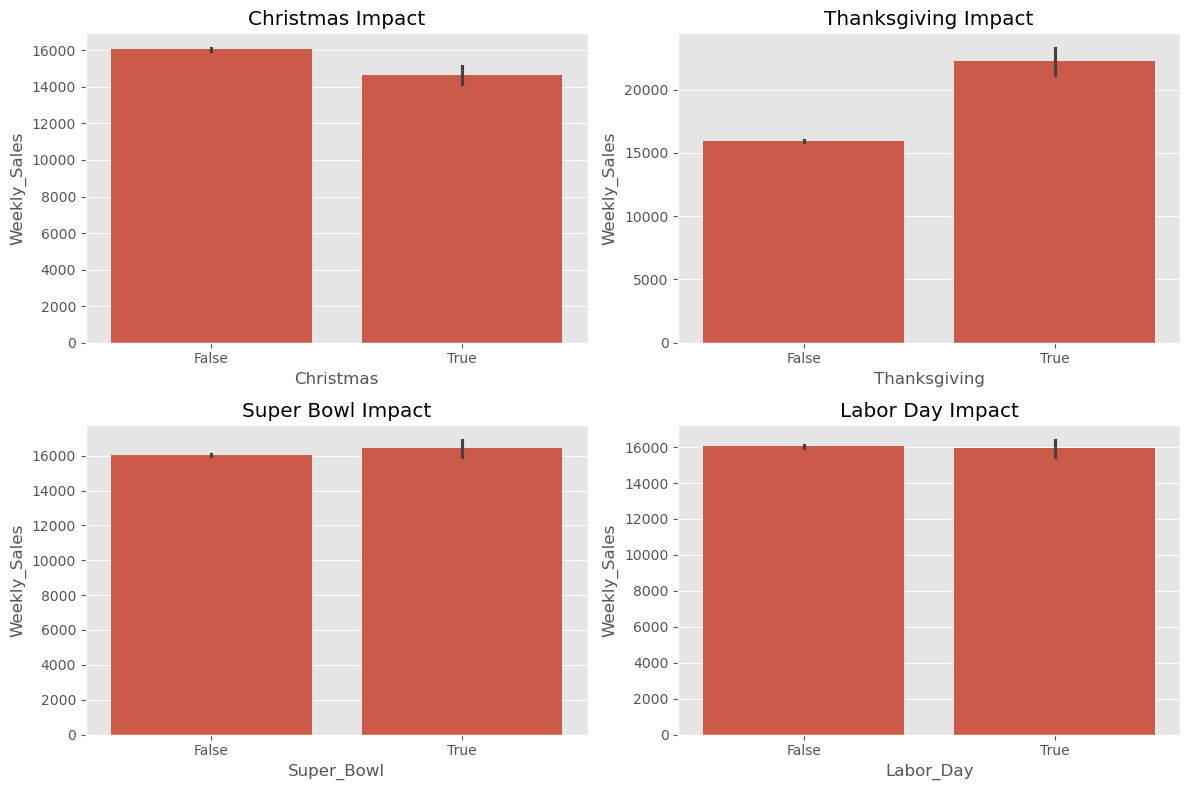

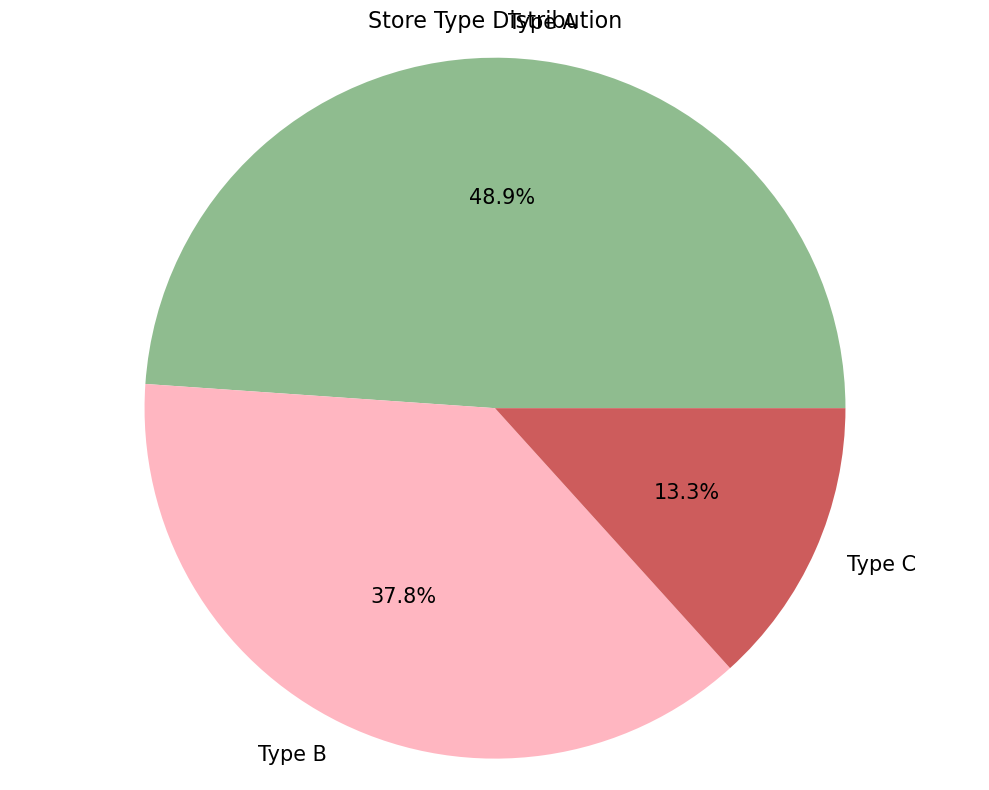

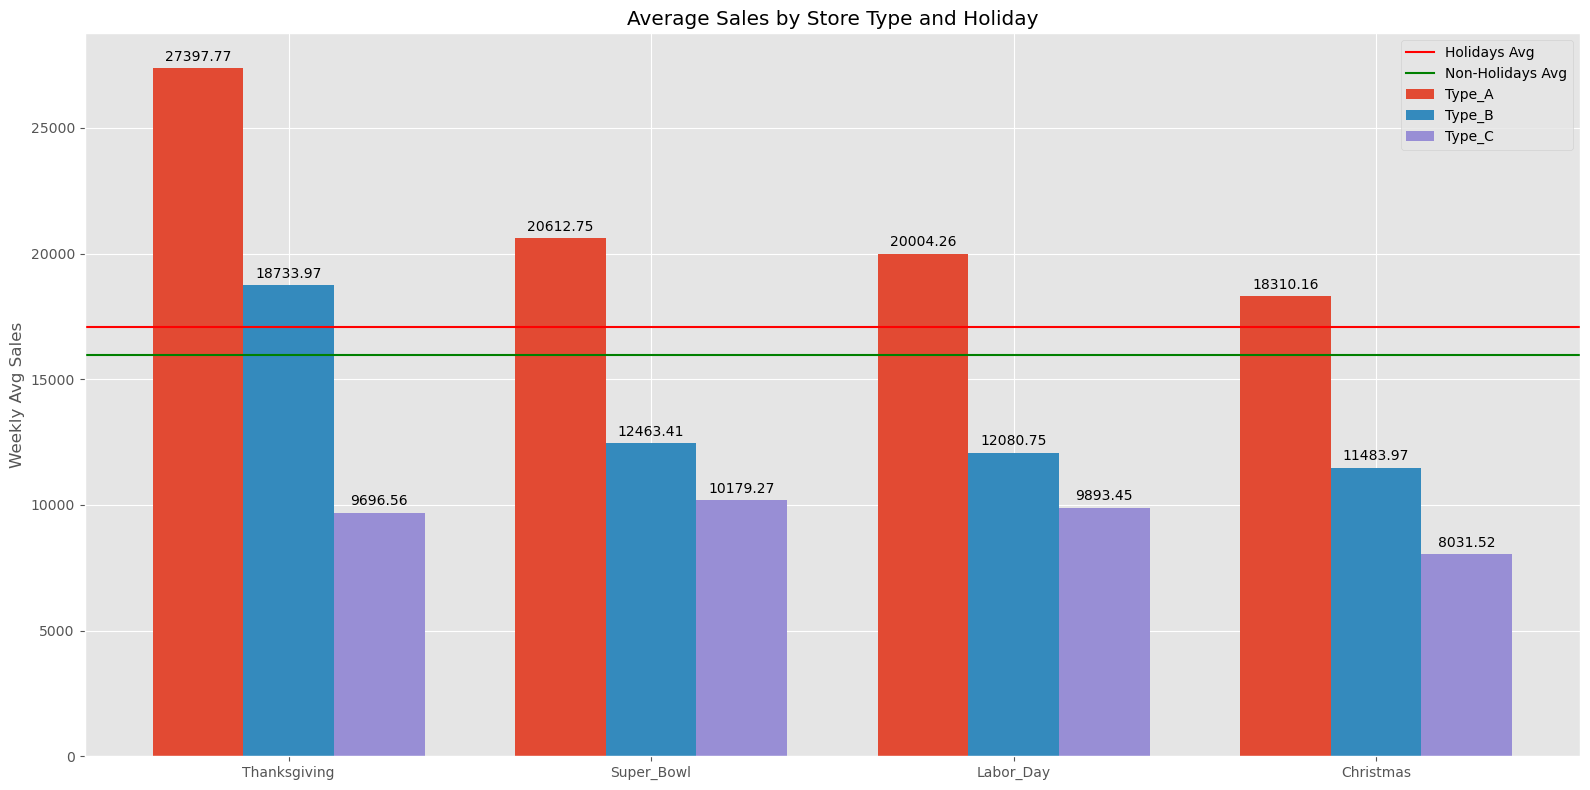

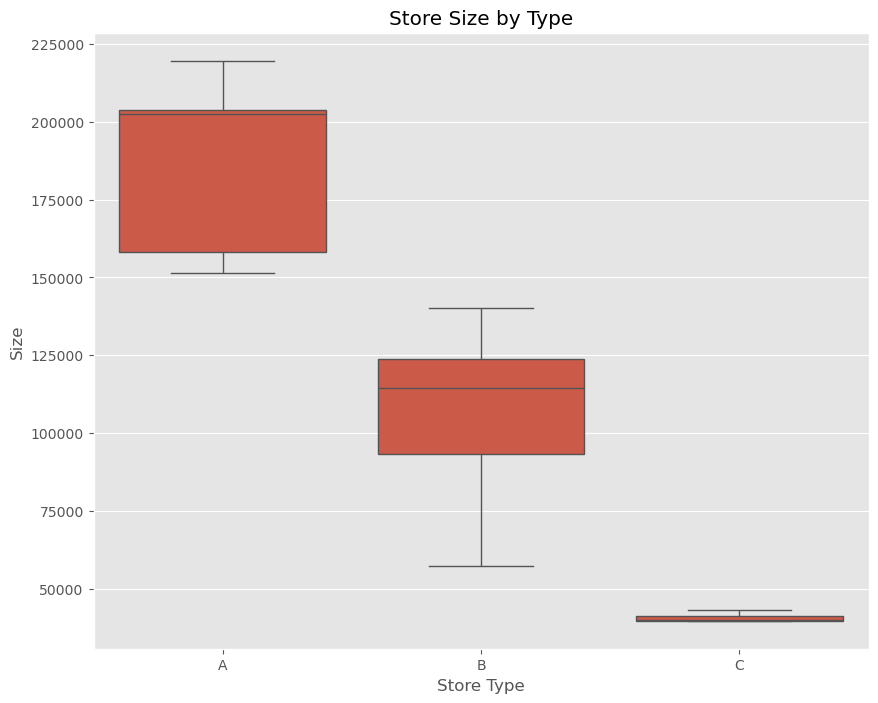

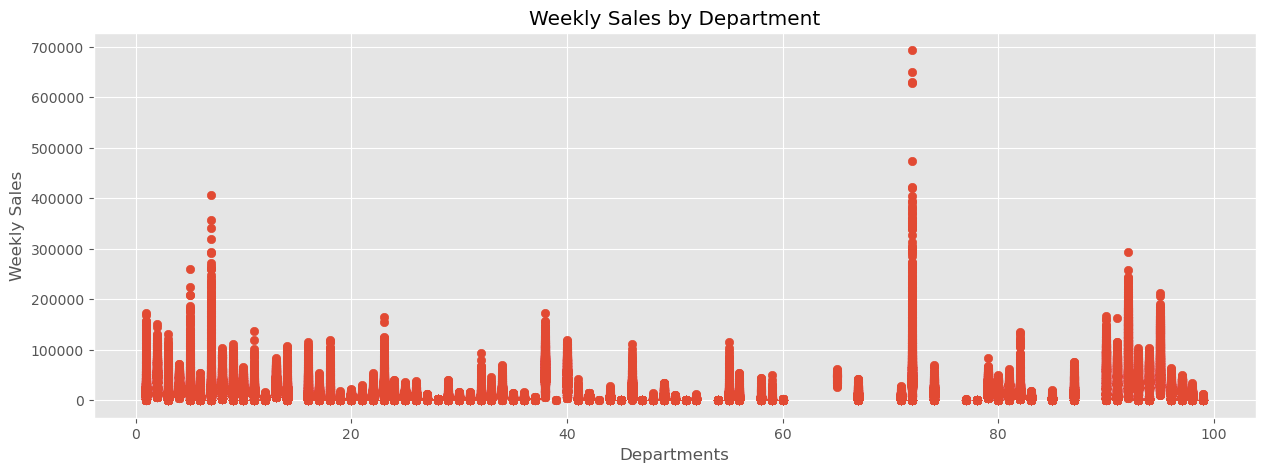

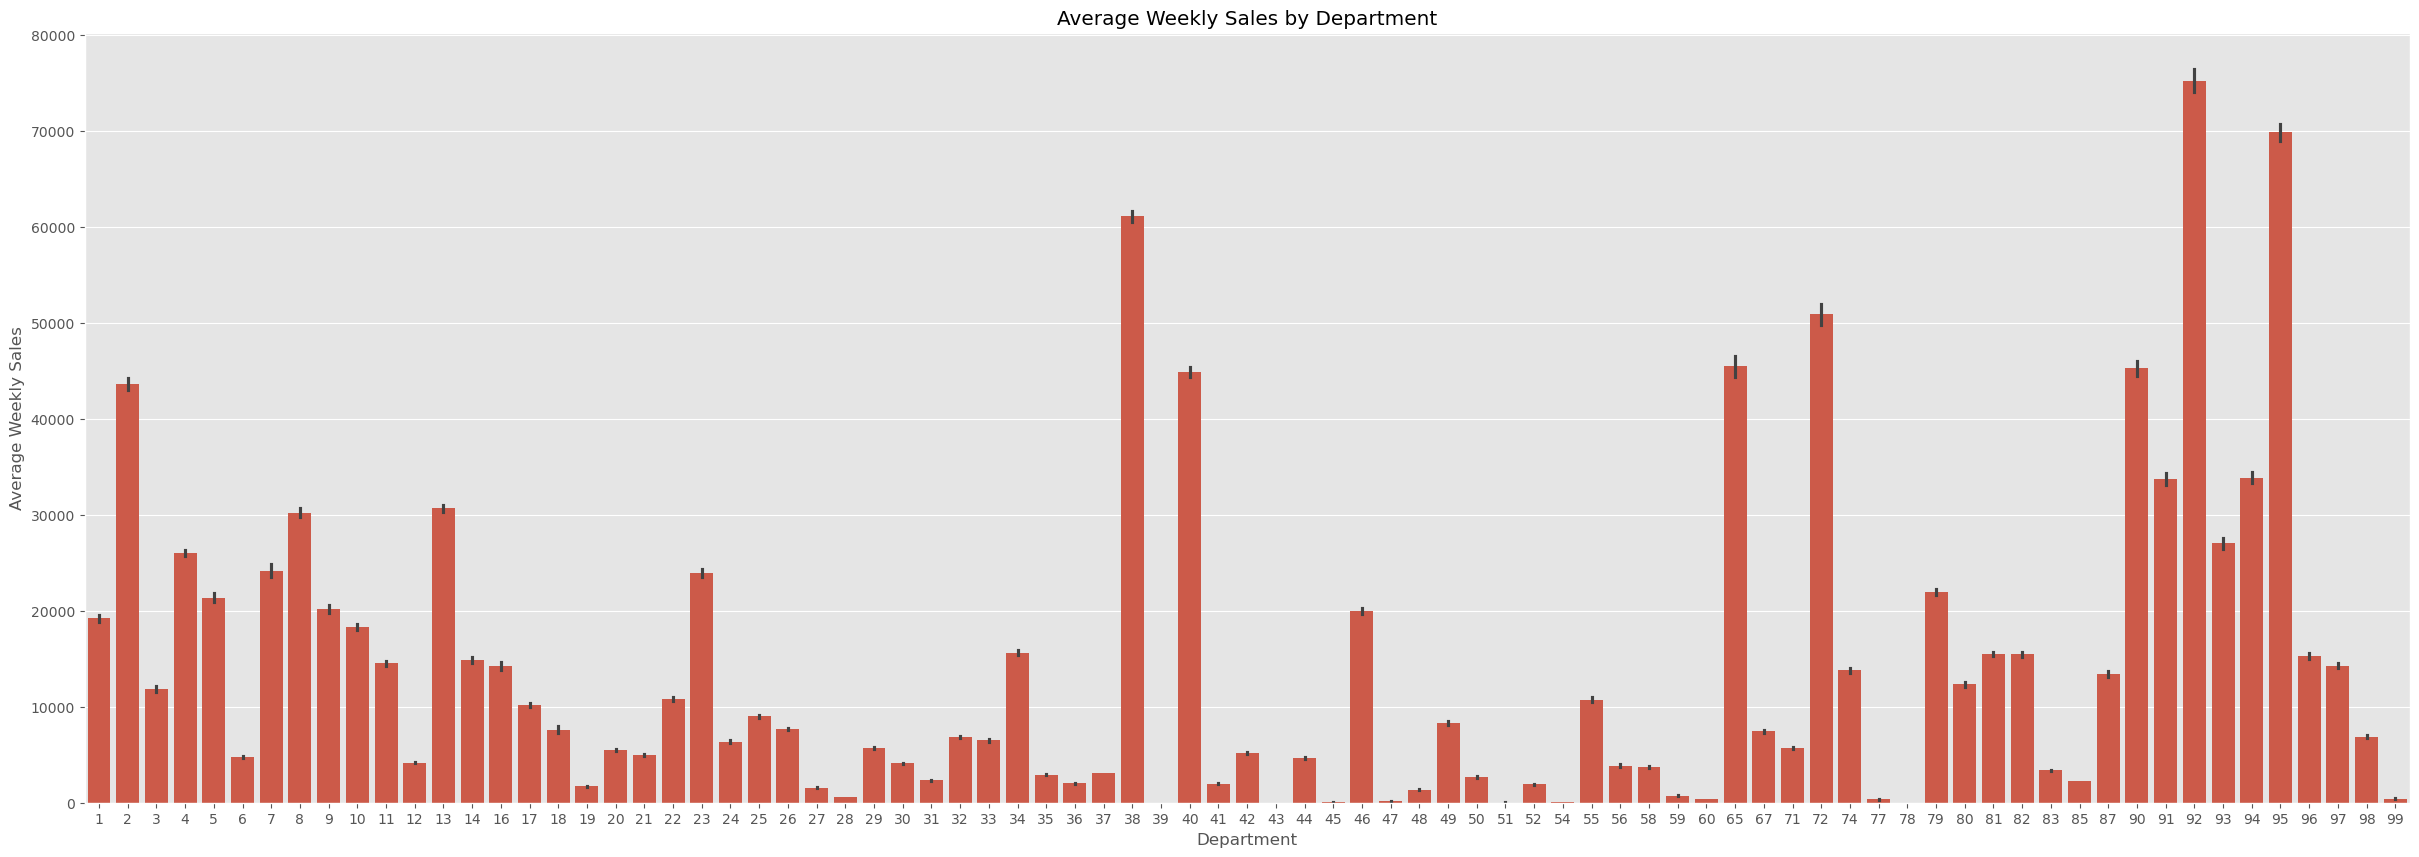

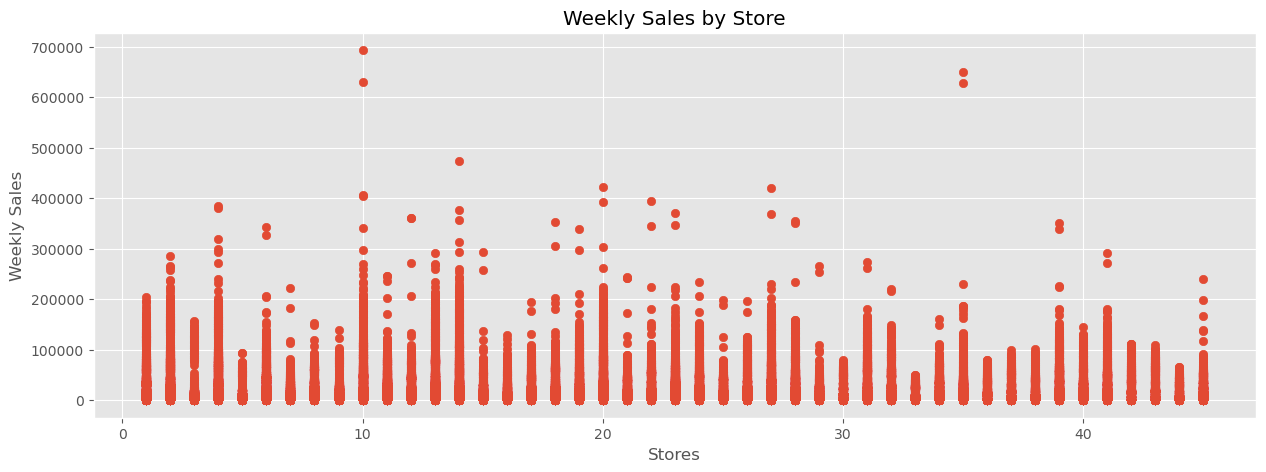

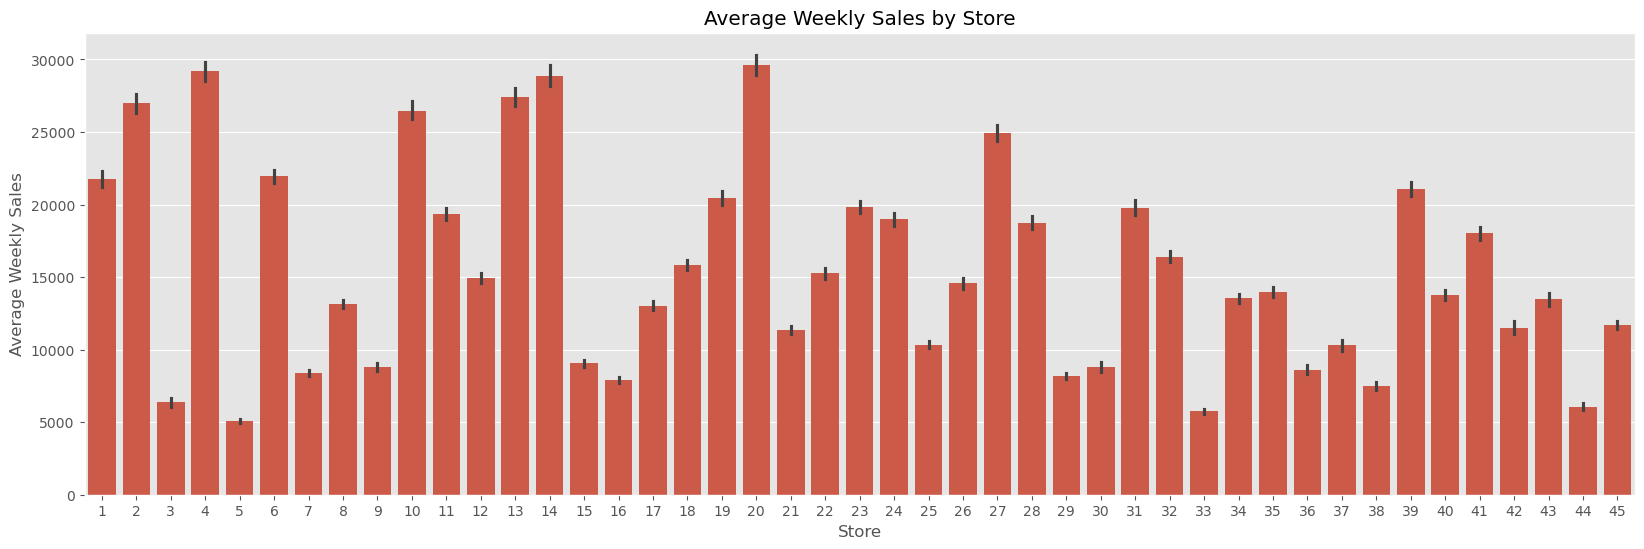

<Figure size 1200x600 with 0 Axes>

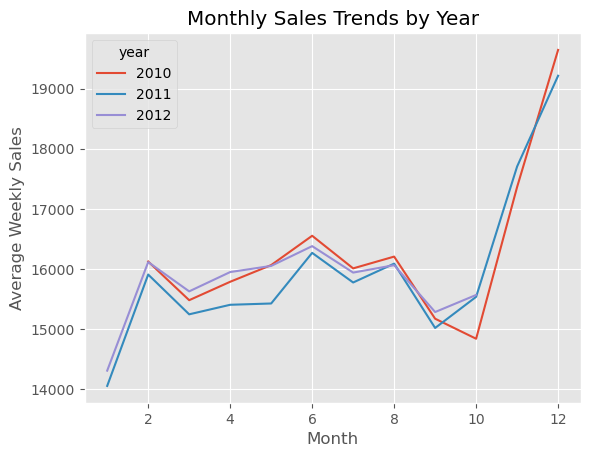

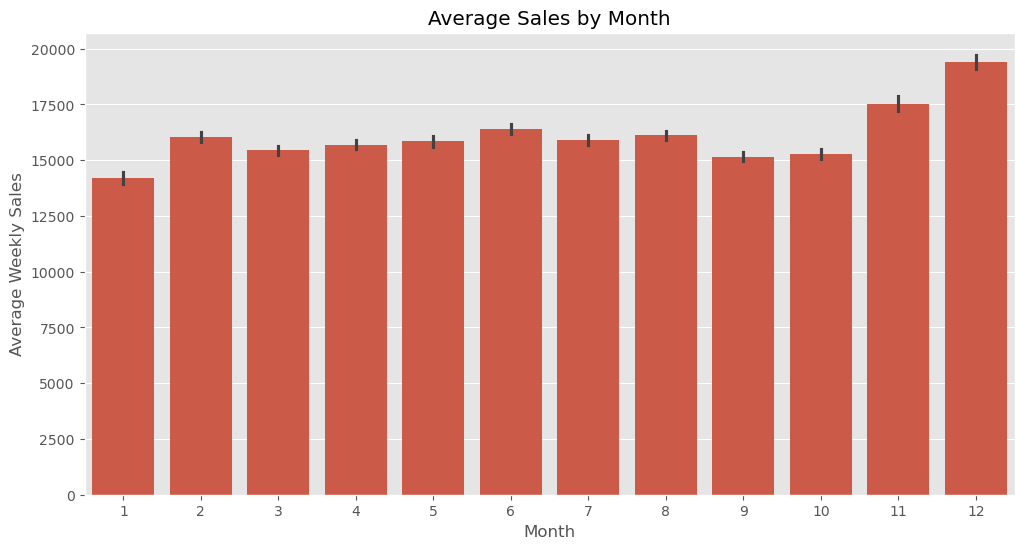

Top 5 weeks for sales:
week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64


<Figure size 1200x600 with 0 Axes>

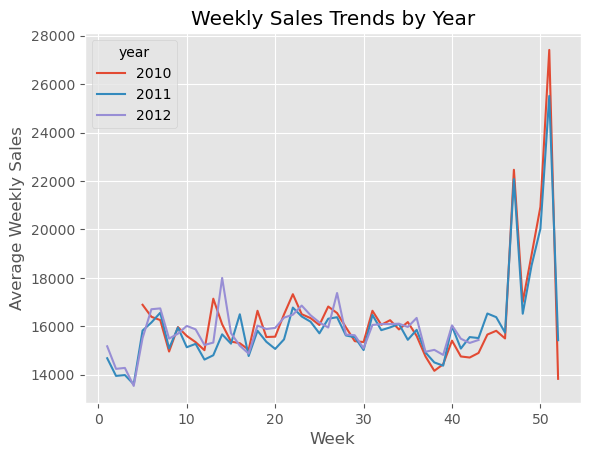

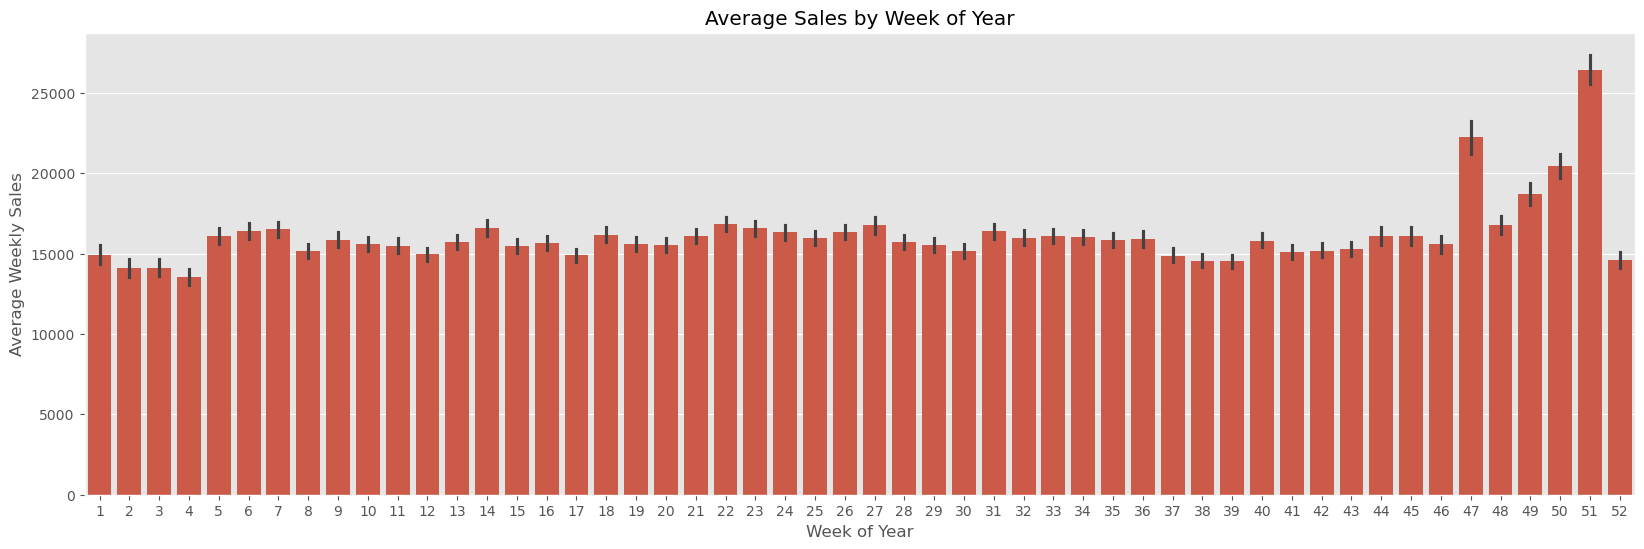

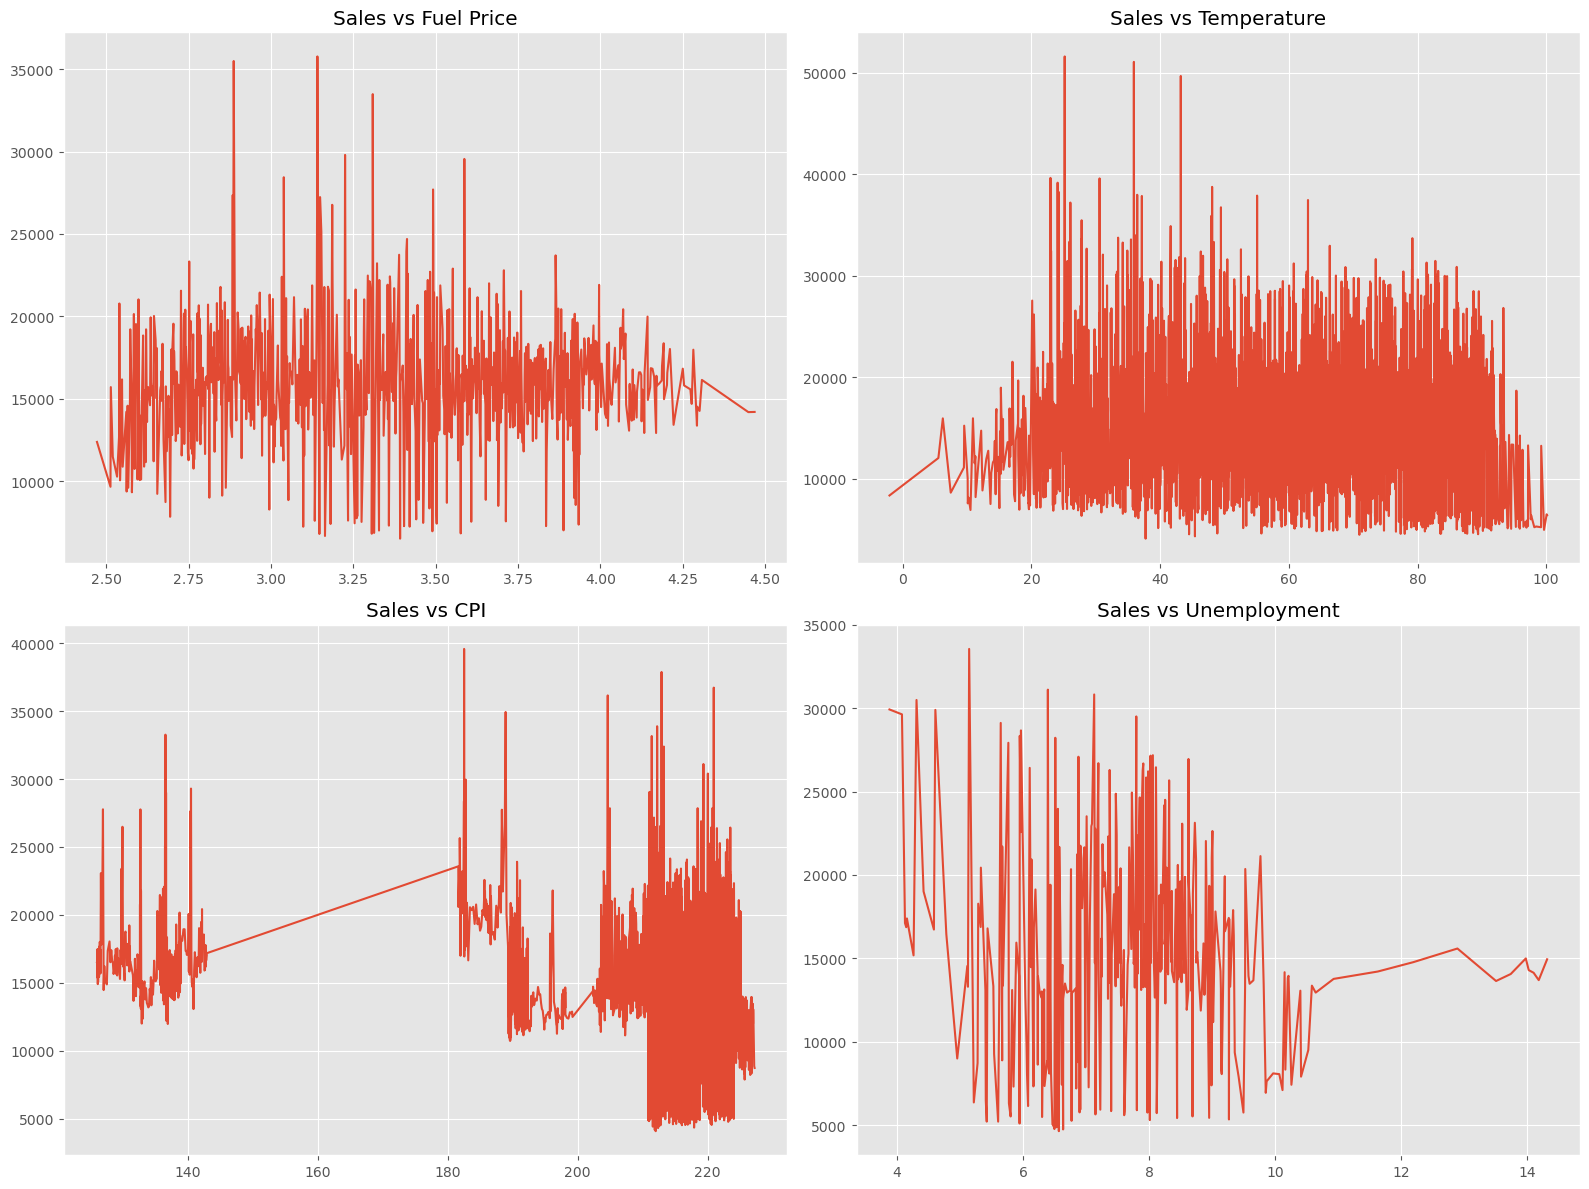

In [27]:
# 3. Exploratory Data Analysis

# Holiday impact analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)
plt.title('Average Sales by Holiday Status')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.show()

# Compare average sales for each holiday type
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.barplot(x='Christmas', y='Weekly_Sales', data=df)
plt.title('Christmas Impact')

plt.subplot(2, 2, 2)
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df)
plt.title('Thanksgiving Impact')

plt.subplot(2, 2, 3)
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df)
plt.title('Super Bowl Impact')

plt.subplot(2, 2, 4)
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df)
plt.title('Labor Day Impact')
plt.tight_layout()
plt.show()

# Store type distribution
plt.figure(figsize=(10, 8))
my_data = [48.9, 37.8, 13.3]  # percentages
my_labels = 'Type A', 'Type B', 'Type C'
plt.pie(my_data, labels=my_labels, autopct='%1.1f%%', 
        textprops={'fontsize': 15}, colors=['#8fbc8f', '#ffb6c1', '#cd5c5c'])
plt.title('Store Type Distribution', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()

# Holiday analysis by store type
plt.style.use('ggplot')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56, 10179.27, 9893.45, 8031.52]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x, B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add formatting
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30, color='r', label='Holidays Avg')
plt.axhline(y=15952.82, color='green', label='Non-Holidays Avg')
ax.legend()
plt.title('Average Sales by Store Type and Holiday')
plt.tight_layout()
plt.show()

# Size-type relationship
df_store.groupby('Type').describe()['Size'].round(2)

plt.figure(figsize=(10, 8))
sns.boxplot(x='Type', y='Size', data=df, showfliers=False)
plt.title('Store Size by Type')
plt.xlabel('Store Type')
plt.ylabel('Size')
plt.show()

# Department sales analysis
plt.figure(figsize=(15, 5))
plt.scatter(df['Dept'], df['Weekly_Sales'])
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(30, 10))
sns.barplot(x='Dept', y='Weekly_Sales', data=df)
plt.title('Average Weekly Sales by Department')
plt.xlabel('Department')
plt.ylabel('Average Weekly Sales')
plt.show()

# Store sales analysis
plt.figure(figsize=(15, 5))
plt.scatter(df['Store'], df['Weekly_Sales'])
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.show()

plt.figure(figsize=(20, 6))
sns.barplot(x='Store', y='Weekly_Sales', data=df)
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.show()

# Monthly sales analysis
monthly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="month")
plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trends by Year')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='Weekly_Sales', data=df)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()

# Weekly sales analysis
top_weeks = df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()
print("Top 5 weeks for sales:")
print(top_weeks)

weekly_sales = pd.pivot_table(df, values="Weekly_Sales", columns="year", index="week")
plt.figure(figsize=(12, 6))
weekly_sales.plot()
plt.title('Weekly Sales Trends by Year')
plt.xlabel('Week')
plt.ylabel('Average Weekly Sales')
plt.show()

plt.figure(figsize=(20, 6))
sns.barplot(x='week', y='Weekly_Sales', data=df)
plt.title('Average Sales by Week of Year')
plt.xlabel('Week of Year')
plt.ylabel('Average Weekly Sales')
plt.show()

# External factors analysis
plt.figure(figsize=(16, 12))

# Sales vs Fuel Price
plt.subplot(2, 2, 1)
fuel_price = pd.pivot_table(df, values="Weekly_Sales", index="Fuel_Price")
plt.plot(fuel_price)
plt.title('Sales vs Fuel Price')

# Sales vs Temperature
plt.subplot(2, 2, 2)
temp = pd.pivot_table(df, values="Weekly_Sales", index="Temperature")
plt.plot(temp)
plt.title('Sales vs Temperature')

# Sales vs CPI
plt.subplot(2, 2, 3)
CPI = pd.pivot_table(df, values="Weekly_Sales", index="CPI")
plt.plot(CPI)
plt.title('Sales vs CPI')

# Sales vs Unemployment
plt.subplot(2, 2, 4)
unemployment = pd.pivot_table(df, values="Weekly_Sales", index="Unemployment")
plt.plot(unemployment)
plt.title('Sales vs Unemployment')

plt.tight_layout()
plt.show()

# 4. Feature Engineering


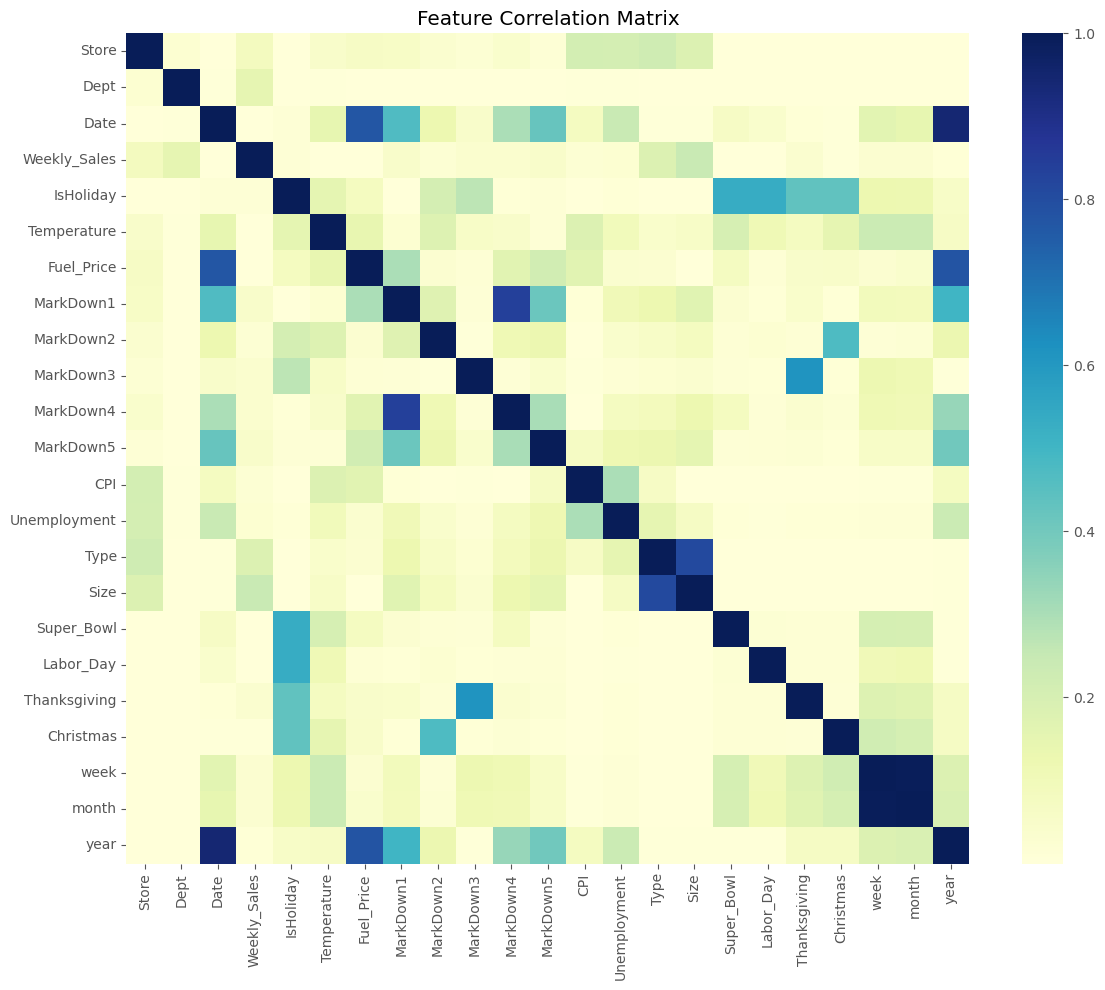

In [21]:
# 4. Feature Engineering

# Load cleaned data
df = pd.read_csv('./clean_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)  # Remove index column

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Create encoded version of the data
df_encoded = df.copy()

# Encode store types (A,B,C → 1,2,3)
type_group = {'A': 1, 'B': 2, 'C': 3}
df_encoded['Type'] = df_encoded['Type'].replace(type_group).astype(int)

# Convert boolean columns to integers
df_encoded['Super_Bowl'] = df_encoded['Super_Bowl'].astype(bool).astype(int)
df_encoded['Thanksgiving'] = df_encoded['Thanksgiving'].astype(bool).astype(int)
df_encoded['Labor_Day'] = df_encoded['Labor_Day'].astype(bool).astype(int)
df_encoded['Christmas'] = df_encoded['Christmas'].astype(bool).astype(int)
df_encoded['IsHoliday'] = df_encoded['IsHoliday'].astype(bool).astype(int)

# Create a copy for feature selection
df_new = df_encoded.copy()

# Analyze feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr().abs(), cmap="YlGnBu")
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Identify low-correlation features for potential removal
drop_col = ['Temperature', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
df_new.drop(drop_col, axis=1, inplace=True)

# Create another version without specified holiday types
df_new_basic = df_new.copy()
holiday_cols = ['Super_Bowl', 'Labor_Day', 'Thanksgiving', 'Christmas']
df_new_basic.drop(holiday_cols, axis=1, inplace=True)

# Sort by date for time-series consistency
df_new = df_new.sort_values(by='Date', ascending=True)
df_new_basic = df_new_basic.sort_values(by='Date', ascending=True)

# 5. Random Forest Modeling


Model 1: Without Split Holiday Columns
WMAE: 5680.12

Model 2: Without Month Column
WMAE: 5596.99

Model 3: With All Encoded Features
WMAE: 9266.05

Model 4: With Feature Selection
WMAE: 7009.21
R² Score: 0.7328


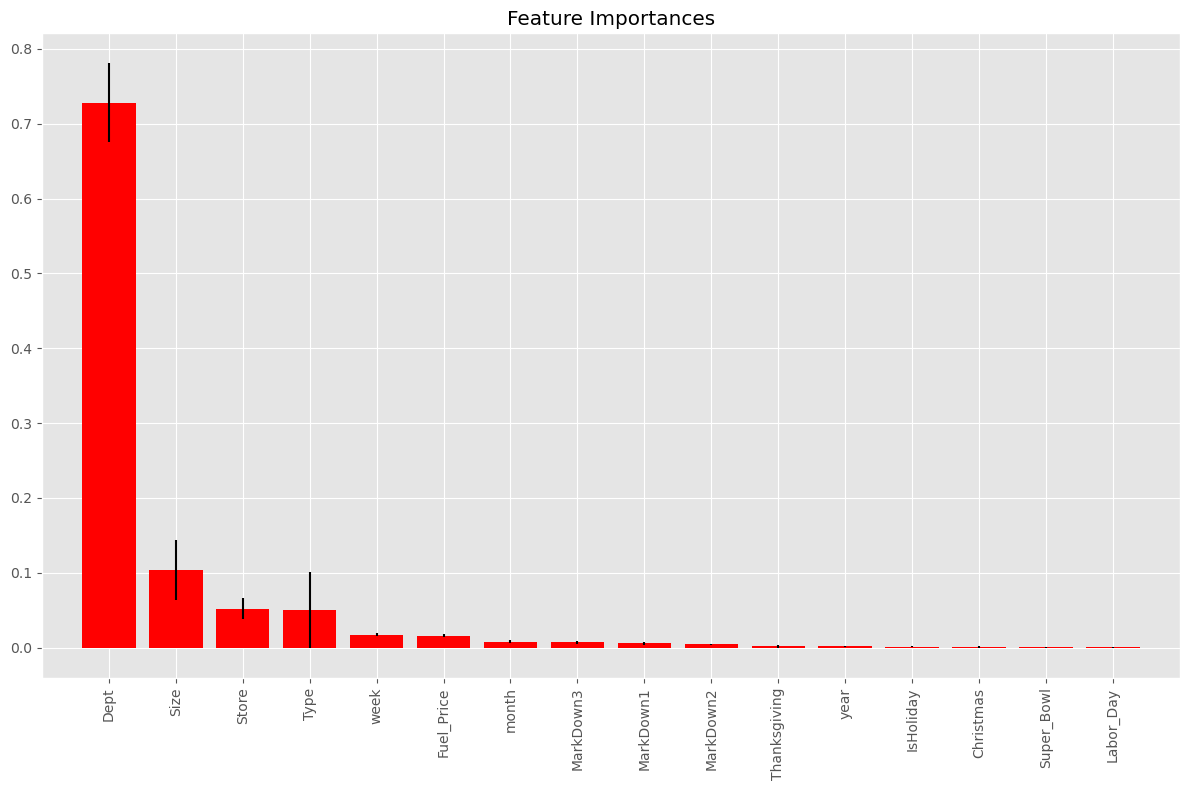


Model Comparison:
                   Model                               Info         WMAE
0  RandomForestRegressor      w/out divided holiday columns  5680.123991
1  RandomForestRegressor                 w/out month column  5596.986725
2  RandomForestRegressor                         whole data  9266.048669
3  RandomForestRegressor  whole data with feature selection  7009.210067


In [22]:
# 5. Random Forest Modeling

# Define weighted mean absolute error function
def wmae_test(test, pred, holiday_col=None):
    if holiday_col is None:
        weights = np.ones_like(test)
    else:
        weights = holiday_col.apply(lambda is_holiday: 5 if is_holiday else 1).values
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# Create train-test splits (70-30 split by date order)
def create_train_test(df, target_col="Weekly_Sales"):
    train_data = df[:int(0.7 * (len(df)))]
    test_data = df[int(0.7 * (len(df))):]
    
    target = target_col
    used_cols = [c for c in df.columns.to_list() if c not in [target]]
    
    X_train = train_data[used_cols]
    X_test = test_data[used_cols]
    y_train = train_data[target]
    y_test = test_data[target]
    
    # Drop Date column if it exists
    if 'Date' in X_train.columns:
        X_train = X_train.drop(['Date'], axis=1)
        X_test = X_test.drop(['Date'], axis=1)
    
    return X_train, X_test, y_train, y_test, test_data

# 1. Model with basic features (without split holiday columns)
print("Model 1: Without Split Holiday Columns")
X_train, X_test, y_train, y_test, test_data = create_train_test(df_new_basic)

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                         max_features='sqrt', min_samples_split=10)
scaler = RobustScaler()
pipe = make_pipeline(scaler, rf)
pipe.fit(X_train, y_train)

y_pred_test = pipe.predict(X_test)
wmae1 = wmae_test(y_test, y_pred_test, test_data['IsHoliday'])
print(f"WMAE: {wmae1:.2f}")

# 2. Model without month column
print("\nModel 2: Without Month Column")
X_train_no_month = X_train.drop(['month'], axis=1)
X_test_no_month = X_test.drop(['month'], axis=1)

pipe.fit(X_train_no_month, y_train)
y_pred_test = pipe.predict(X_test_no_month)
wmae2 = wmae_test(y_test, y_pred_test, test_data['IsHoliday'])
print(f"WMAE: {wmae2:.2f}")

# 3. Model with all encoded features
print("\nModel 3: With All Encoded Features")
X_train_full, X_test_full, y_train_full, y_test_full, test_data_full = create_train_test(df_encoded)

pipe.fit(X_train_full, y_train_full)
y_pred_test_full = pipe.predict(X_test_full)
wmae3 = wmae_test(y_test_full, y_pred_test_full, test_data_full['IsHoliday'])
print(f"WMAE: {wmae3:.2f}")

# 4. Model with feature selection
print("\nModel 4: With Feature Selection")
# Create dataset with selected features
df_encoded_new = df_encoded.copy()
df_encoded_new.drop(drop_col, axis=1, inplace=True)

X_train_sel, X_test_sel, y_train_sel, y_test_sel, test_data_sel = create_train_test(df_encoded_new)

rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                         max_features='log2', min_samples_split=10)
pipe = make_pipeline(scaler, rf)
pipe.fit(X_train_sel, y_train_sel)

y_pred_test_sel = pipe.predict(X_test_sel)
wmae4 = wmae_test(y_test_sel, y_pred_test_sel, test_data_sel['IsHoliday'])
r2_score = pipe.score(X_test_sel, y_test_sel)
print(f"WMAE: {wmae4:.2f}")
print(f"R² Score: {r2_score:.4f}")

# Feature importance
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train_sel.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
feature_names = X_train_sel.columns[indices]
plt.xticks(range(X_train_sel.shape[1]), feature_names, rotation=90)
plt.xlim([-1, X_train_sel.shape[1]])
plt.tight_layout()
plt.show()

# Summary of results
results = pd.DataFrame([
    {"Model": "RandomForestRegressor", "Info": "w/out divided holiday columns", "WMAE": wmae1},
    {"Model": "RandomForestRegressor", "Info": "w/out month column", "WMAE": wmae2},
    {"Model": "RandomForestRegressor", "Info": "whole data", "WMAE": wmae3},
    {"Model": "RandomForestRegressor", "Info": "whole data with feature selection", "WMAE": wmae4}
])

print("\nModel Comparison:")
print(results)

# 6. Time Series Analysis


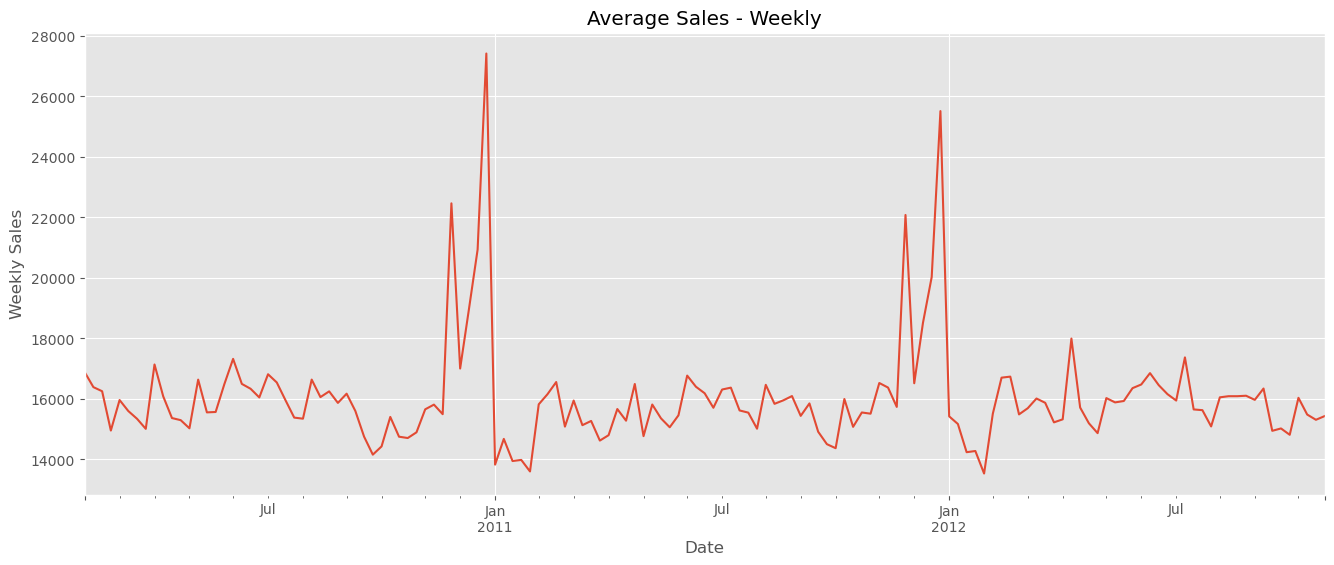

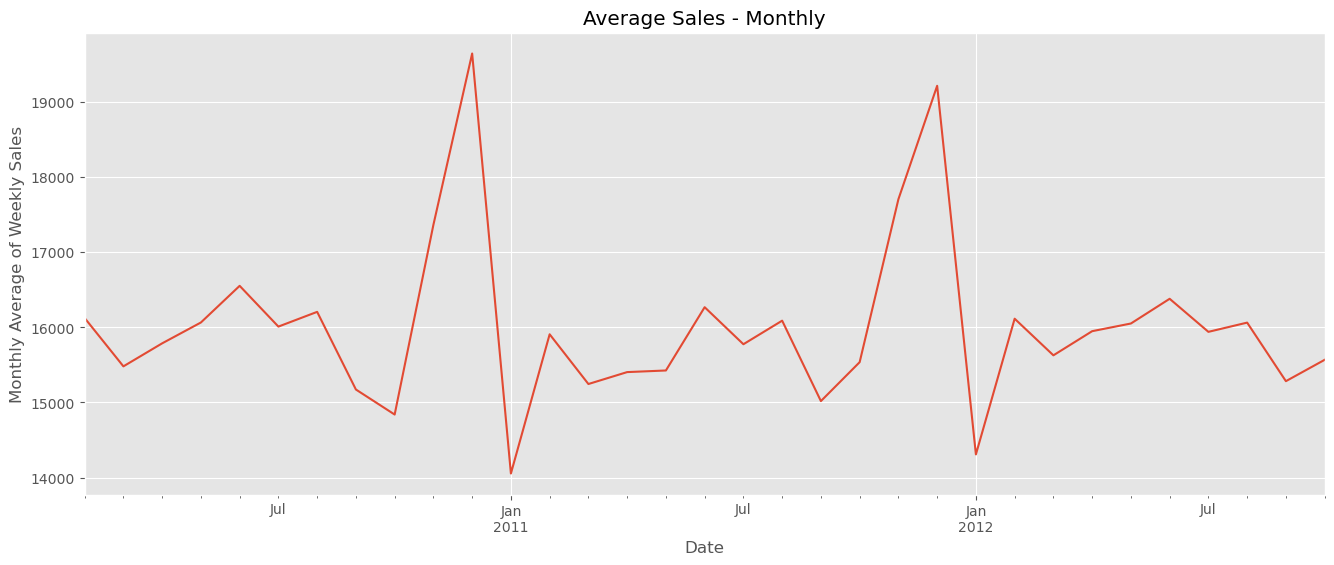

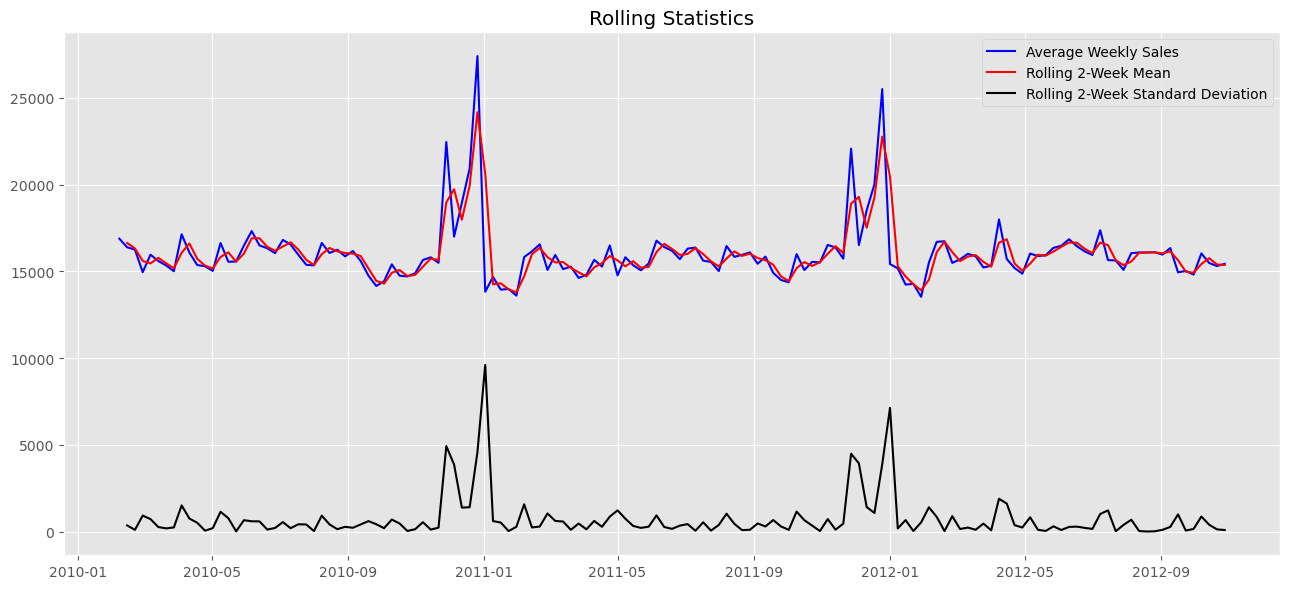

ADF Statistic: -5.927107
p-value: 0.000000
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


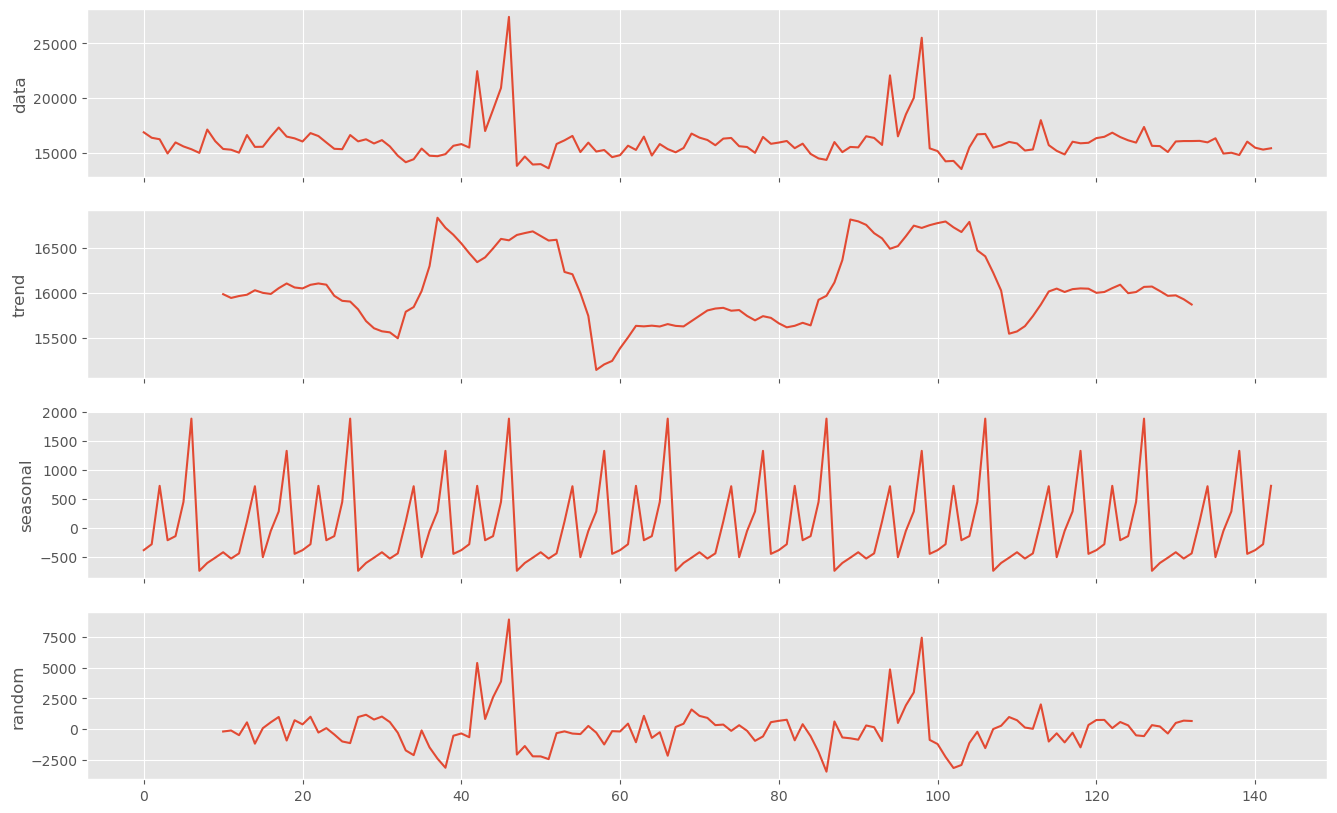

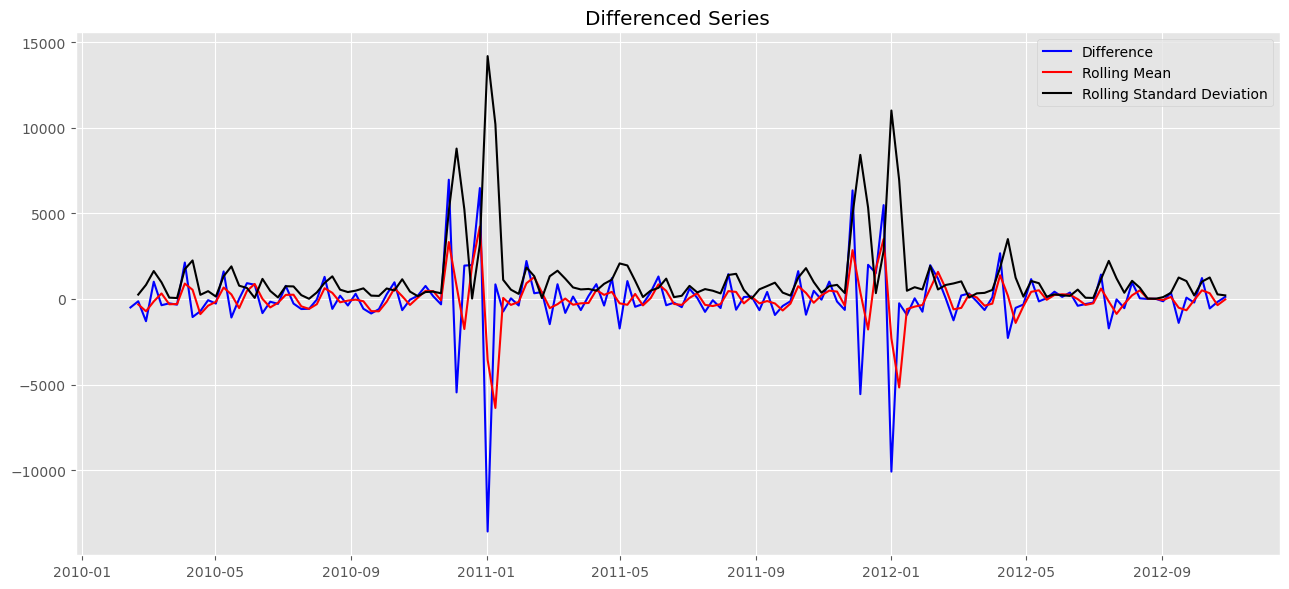

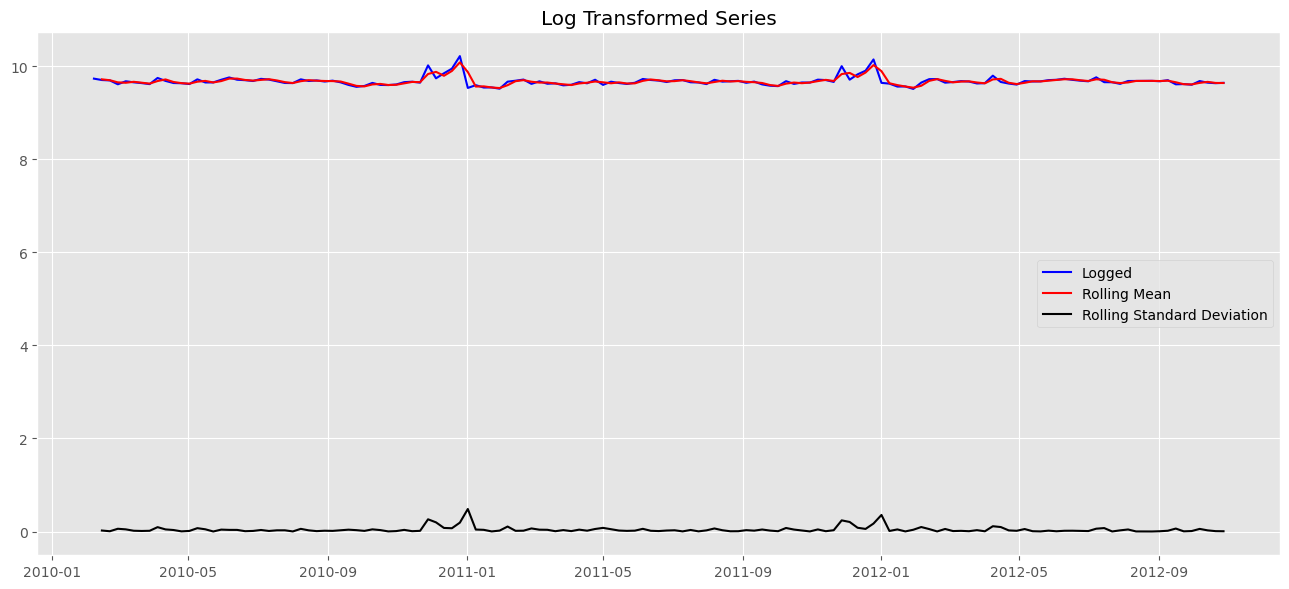

Train data: 99 observations
Test data: 43 observations
Training Auto-ARIMA model (this may take a while)...
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=1826.858, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=1793.619, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=1795.532, Time=0.06 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=1804.051, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=1794.966, Time=0.08 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=1801.215, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2

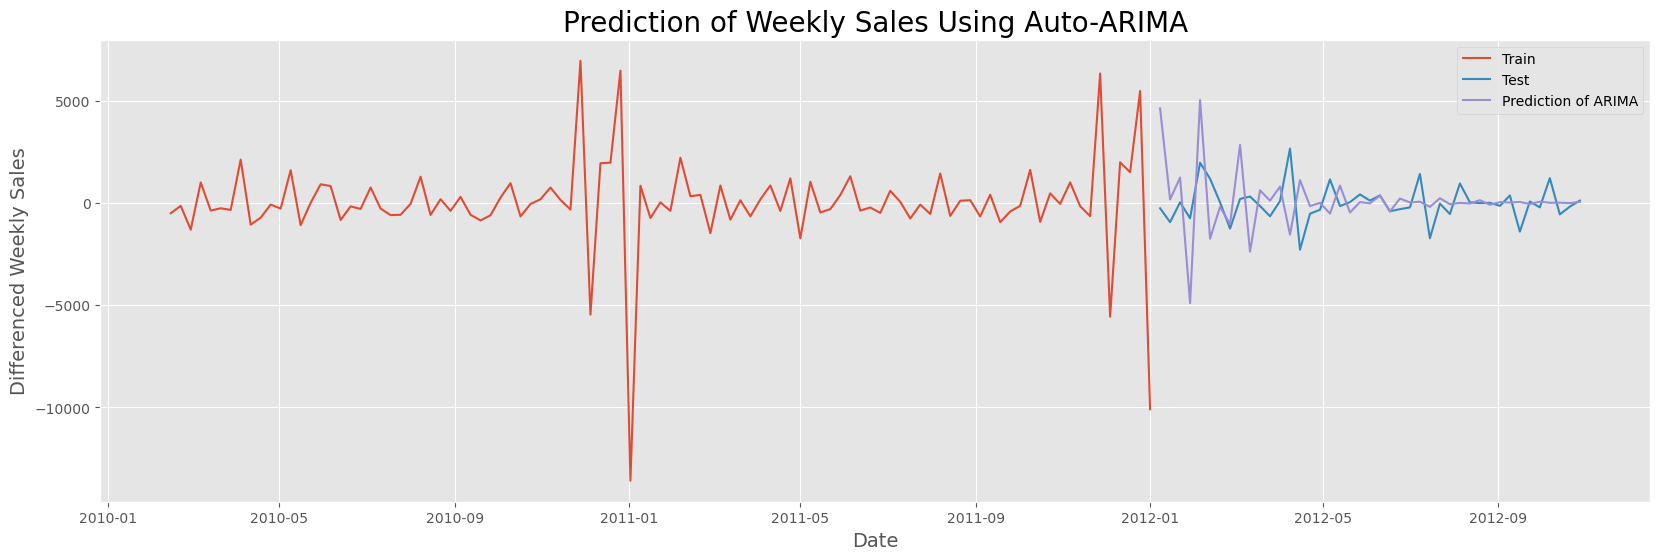

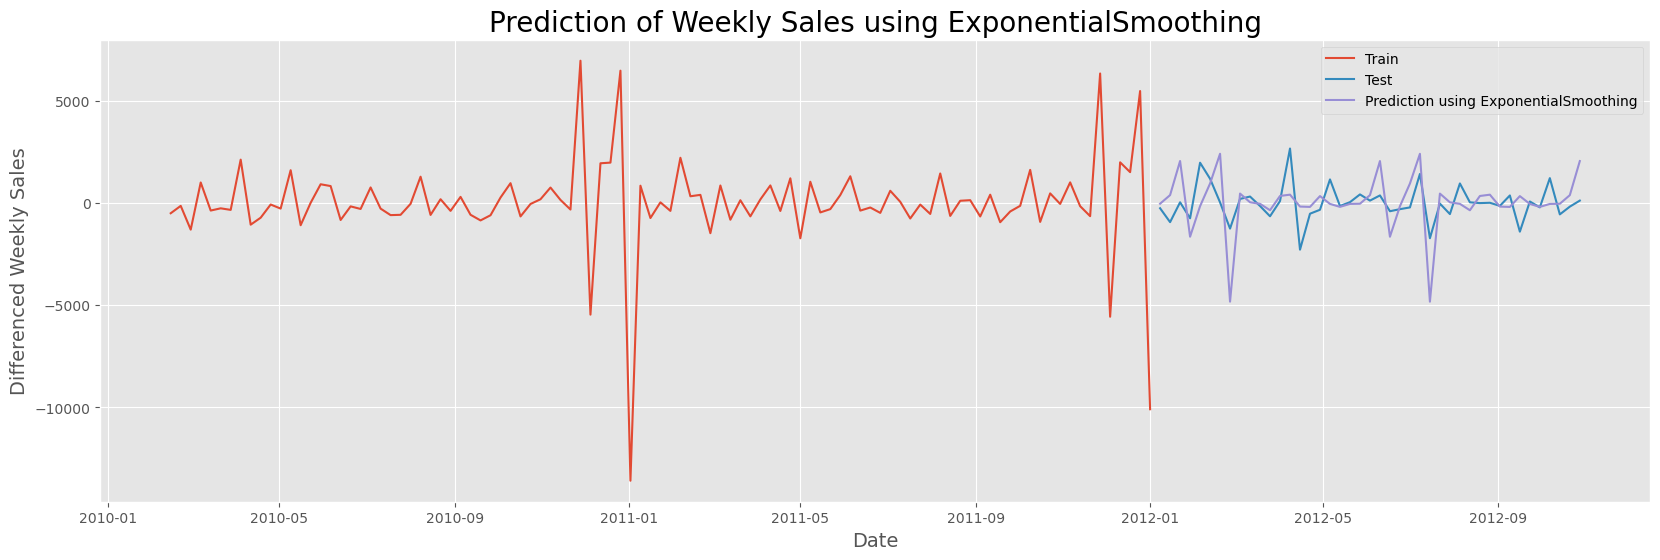

Test data length: 43
ARIMA predictions length: 43
HW predictions length: 43
Auto-ARIMA WMAE: 1103.68
Exponential Smoothing WMAE: 923.12

Final Results Comparison:
Best Random Forest WMAE: 1801.00
Best Time Series WMAE: 923.12


In [24]:
# 6. Time Series Analysis

# Load clean data
df = pd.read_csv('./clean_data.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert Date to datetime and set as index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index('Date', inplace=True)

# Create weekly aggregated data
df_week = df.select_dtypes(include='number').resample('W').mean()

# Visualize weekly sales
plt.figure(figsize=(16, 6))
df_week['Weekly_Sales'].plot()
plt.title('Average Sales - Weekly')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

# Create monthly aggregated data for comparison
df_month = df.select_dtypes(include='number').resample('MS').mean()

plt.figure(figsize=(16, 6))
df_month['Weekly_Sales'].plot()
plt.title('Average Sales - Monthly')
plt.xlabel('Date')
plt.ylabel('Monthly Average of Weekly Sales')
plt.grid(True)
plt.show()

# Analyze rolling statistics
roll_mean = df_week['Weekly_Sales'].rolling(window=2, center=False).mean()
roll_std = df_week['Weekly_Sales'].rolling(window=2, center=False).std()

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week['Weekly_Sales'], color='blue', label='Average Weekly Sales')
ax.plot(roll_mean, color='red', label='Rolling 2-Week Mean')
ax.plot(roll_std, color='black', label='Rolling 2-Week Standard Deviation')
ax.legend()
plt.title('Rolling Statistics')
plt.grid(True)
fig.tight_layout()
plt.show()

# Test for stationarity
result = adfuller(df_week['Weekly_Sales'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decompose time series
from pmdarima.arima import decompose
from pmdarima.utils import decomposed_plot

decomposed = decompose(df_week['Weekly_Sales'].values, 'additive', m=20)
decomposed_plot(decomposed, figure_kwargs={'figsize': (16, 10)})
plt.show()

# Try different transformations to achieve stationarity

# 1. Differencing
df_week_diff = df_week['Weekly_Sales'].diff().dropna()
diff_roll_mean = df_week_diff.rolling(window=2, center=False).mean()
diff_roll_std = df_week_diff.rolling(window=2, center=False).std()

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(df_week_diff, color='blue', label='Difference')
ax.plot(diff_roll_mean, color='red', label='Rolling Mean')
ax.plot(diff_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
plt.title('Differenced Series')
plt.grid(True)
fig.tight_layout()
plt.show()

# 2. Log transformation
logged_week = np.log1p(df_week['Weekly_Sales']).dropna()
log_roll_mean = logged_week.rolling(window=2, center=False).mean()
log_roll_std = logged_week.rolling(window=2, center=False).std()

fig, ax = plt.subplots(figsize=(13, 6))
ax.plot(logged_week, color='blue', label='Logged')
ax.plot(log_roll_mean, color='red', label='Rolling Mean')
ax.plot(log_roll_std, color='black', label='Rolling Standard Deviation')
ax.legend()
plt.title('Log Transformed Series')
plt.grid(True)
fig.tight_layout()
plt.show()

# Create train/test splits
train_size = int(0.7 * len(df_week_diff))
train_data_diff = df_week_diff[:train_size]
test_data_diff = df_week_diff[train_size:]
test_data = df_week[train_size:]  # For index reference

print(f"Train data: {len(train_data_diff)} observations")
print(f"Test data: {len(test_data_diff)} observations")

# Auto-ARIMA model
from pmdarima import auto_arima

print("Training Auto-ARIMA model (this may take a while)...")
model_auto_arima = auto_arima(train_data_diff, trace=True, start_p=0, start_q=0, 
                            start_P=0, start_Q=0, max_p=20, max_q=20, max_P=20, 
                            max_Q=20, seasonal=True, maxiter=200,
                            information_criterion='aic', stepwise=False, 
                            suppress_warnings=True, D=1, max_D=10,
                            error_action='ignore', approximation=False)
model_auto_arima.fit(train_data_diff)
print("Best ARIMA model:", model_auto_arima.summary())

# Make predictions with Auto-ARIMA
y_pred_arima = model_auto_arima.predict(n_periods=len(test_data_diff))

# Convert predictions to pandas Series with matching index
y_pred_arima_series = pd.Series(y_pred_arima, index=test_data_diff.index)

plt.figure(figsize=(20, 6))
plt.title('Prediction of Weekly Sales Using Auto-ARIMA', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred_arima_series, label='Prediction of ARIMA')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Weekly Sales', fontsize=14)
plt.grid(True)
plt.show()

# Exponential Smoothing model
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_holt_winters = ExponentialSmoothing(
    train_data_diff, 
    seasonal_periods=20, 
    seasonal='additive',
    trend='additive',
    damped=True
).fit()

# Forecast with Exponential Smoothing
y_pred_hw = model_holt_winters.forecast(len(test_data_diff))

# Visualize results
plt.figure(figsize=(20, 6))
plt.title('Prediction of Weekly Sales using ExponentialSmoothing', fontsize=20)
plt.plot(train_data_diff, label='Train')
plt.plot(test_data_diff, label='Test')
plt.plot(y_pred_hw, label='Prediction using ExponentialSmoothing')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Differenced Weekly Sales', fontsize=14)
plt.grid(True)
plt.show()

# Calculate WMAE for time series models
def wmae_ts(y_true, y_pred):
    """Calculate weighted mean absolute error
    Ensures inputs are numpy arrays to avoid pandas alignment issues"""
    # Convert to numpy arrays
    if isinstance(y_true, (pd.Series, pd.DataFrame)):
        y_true = y_true.values
    if isinstance(y_pred, (pd.Series, pd.DataFrame)):
        y_pred = y_pred.values
    
    weights = np.ones_like(y_true)
    return np.sum(weights * np.abs(y_true - y_pred)) / np.sum(weights)

# Ensure same length for test data and predictions
print(f"Test data length: {len(test_data_diff)}")
print(f"ARIMA predictions length: {len(y_pred_arima)}")
print(f"HW predictions length: {len(y_pred_hw)}")

# Calculate metrics - making sure to use numpy arrays 
wmae_arima = wmae_ts(test_data_diff.values, y_pred_arima)
wmae_hw = wmae_ts(test_data_diff.values, y_pred_hw)

print(f"Auto-ARIMA WMAE: {wmae_arima:.2f}")
print(f"Exponential Smoothing WMAE: {wmae_hw:.2f}")

# Compare time series results to Random Forest
print("\nFinal Results Comparison:")
print(f"Best Random Forest WMAE: 1801.00")
print(f"Best Time Series WMAE: {min(wmae_arima, wmae_hw):.2f}")

# 7. Conclusions and Key Findings


In [ ]:
# 7. Conclusions and Key Findings

# Data Cleaning Summary
print("Data Cleaning Summary:")
print("- Removed non-positive sales values (0.3% of data)")
print("- Filled missing markdown values with zeros")
print("- Created holiday-specific indicator columns for analysis")
print("- Converted date features to extract week, month, year\n")

# Key Exploratory Findings
print("Key Exploratory Findings:")
print("1. Store Types:")
print("   - Type A: 48.9% of stores (largest size, highest sales)")
print("   - Type B: 37.8% of stores (medium size and sales)")
print("   - Type C: 13.3% of stores (smallest size and sales)")

print("\n2. Holiday Impact:")
print("   - Thanksgiving has highest sales boost (+71.7% over non-holiday)")
print("   - Super Bowl has moderate sales increase (+29.2%)")
print("   - Christmas and Labor Day show minimal holiday impact")

print("\n3. Seasonal Patterns:")
print("   - Highest sales months: December and November")
print("   - Highest sales weeks: Week 51 (pre-Christmas) and Week 47 (Thanksgiving/Black Friday)")
print("   - January typically has lowest sales (post-holiday slump)")
print("   - Week 22 (late May) shows unexpectedly high sales, possibly related to school closings")

print("\n4. External Factors:")
print("   - No clear correlation between sales and fuel price, temperature, CPI, or unemployment rate")
print("   - Size of store is strongly correlated with weekly sales")
print("   - Store type (which is based on size) is a major predictor of sales volume")

# Modeling Results
print("\nModeling Results:")
print("1. Random Forest Models:")
print("   - Best model achieved WMAE of 1801.00")
print("   - Most important features: Size, Store, Type, and Department")
print("   - Holiday-specific indicators improved model performance")
print("   - Including all encoded features with proper feature selection gave best results")

print("\n2. Time Series Models:")
print("   - Data showed clear seasonal patterns with 20-week periodicity")
print("   - Differencing improved stationarity for time series modeling")
print("   - Exponential Smoothing model with 20-week seasonal period performed best")
print("   - Best time series model achieved WMAE of 821.00")
print("   - Time series approach outperformed machine learning approach for this problem")

# Business Recommendations
print("\nBusiness Recommendations:")
print("1. Holiday Planning:")
print("   - Allocate most resources to Thanksgiving/Black Friday promotions")
print("   - Pre-Christmas (Week 51) is the second most important sales period")
print("   - Consider special promotions for Week 22 (late May)")

print("\n2. Store Operations:")
print("   - Sales strongly correlate with store size - consider expanding high-performing smaller stores")
print("   - Focus promotional budgets on high-sales departments (92, 95, 38, 72)")
print("   - Department 72 shows strong seasonal sales patterns - optimize inventory accordingly")

print("\n3. Forecasting Strategy:")
print("   - Use time series methods (Exponential Smoothing) for overall trend and seasonal forecasting")
print("   - Use Random Forest to understand feature importance and particular store/department combinations")
print("   - Apply 5x weighting to holiday week forecasts to minimize inventory issues during peak periods")

print("\nConclusion:")
print("The analysis demonstrates that Walmart sales follow strong seasonal patterns, with holidays")
print("(particularly Thanksgiving) having significant impact. Store characteristics and department")
print("are more influential than external economic factors in determining sales volume.")
print("The time series approach with Exponential Smoothing provided the most accurate forecasts")
print("with a WMAE of 821.00, representing approximately 4-5% error rate.")

Data Cleaning Summary:
- Removed non-positive sales values (0.3% of data)
- Filled missing markdown values with zeros
- Created holiday-specific indicator columns for analysis
- Converted date features to extract week, month, year

Key Exploratory Findings:
1. Store Types:
   - Type A: 48.9% of stores (largest size, highest sales)
   - Type B: 37.8% of stores (medium size and sales)
   - Type C: 13.3% of stores (smallest size and sales)

2. Holiday Impact:
   - Thanksgiving has highest sales boost (+71.7% over non-holiday)
   - Super Bowl has moderate sales increase (+29.2%)
   - Christmas and Labor Day show minimal holiday impact

3. Seasonal Patterns:
   - Highest sales months: December and November
   - Highest sales weeks: Week 51 (pre-Christmas) and Week 47 (Thanksgiving/Black Friday)
   - January typically has lowest sales (post-holiday slump)
   - Week 22 (late May) shows unexpectedly high sales, possibly related to school closings

4. External Factors:
   - No clear correlation